In [156]:
import pandas as pd
import json
import seaborn as sns
import numpy as np

In [157]:

f = open('out.json')

data = json.load(f)
data_list = []
for text_id, annotated_text in data.items():
    annotation_ids = [k for k in annotated_text.keys() if k not in ["text", "text_id"]] 
    annotations = []
    for an_id in annotation_ids:
        annotations.append(annotated_text[an_id])
    for annotation in annotations:
        new_text = {
            'text_id': text_id,
            'text': annotated_text['text'],
            'user_id': annotation["user_id"],
            'user_topics': [t for t in annotation["topics"] if t != ""],
        }
        data_list.append(new_text)

# Create DataFrame
df = pd.DataFrame(data_list)
df

,text_id,text,user_id,user_topics
0,d2e4422a-d1c0-4a88-a9cf-bbc186894371,"<b>Italie, jmenovitě severní, má od dob Karla...",cda7a4d1-e749-4780-a4ea-a21d40030990,"[mezistátní vztahy, malířske bratstvo]"
1,96e2e09d-af79-4fd5-bf04-235f61440ca5,"<b>Chce-li poznačiti nástroj, ukazuje na domn...",e843c941-f58c-496e-af8a-beef38820b13,"[nakládání s nástroji, pohyby s nástroji]"
2,151f5545-b49d-4a30-a755-7726732da4e9,<b>Při sázení některých složitějších prací je...,e843c941-f58c-496e-af8a-beef38820b13,"[typografie, grafický design, sazba textu, pří..."
3,41d19573-2e5f-4bb6-b13b-8868227d4567,"<b>Začali večeřeti, ale nedali tomu mnoho. Mí...",cda7a4d1-e749-4780-a4ea-a21d40030990,"[jedení, večeření]"
4,662cdb90-66fd-44ab-837a-ed6d824bb42f,<b>Letha od narození Syna božího tisíczeho pě...,cda7a4d1-e749-4780-a4ea-a21d40030990,"[uzavírání smlouv, pracovní smlouva]"
...,...,...,...,...
6480,0f332301-53f1-40e1-95a7-893a81443331,"<b>Stará klíčnice v žluté, kudrnaté paruce, p...",e843c941-f58c-496e-af8a-beef38820b13,"[Nepokojná klíčnice, Klíčnice v naději]"
6481,74c5b8c4-a0c2-4384-a24e-1473e6062318,"<b>„S bohem,“ řekl, podávaje Jindřichovi ruku...",e843c941-f58c-496e-af8a-beef38820b13,"[rozloučení, rozloučení dvou přátel]"
6482,b03cd9f2-51ed-44c4-b9ef-d80d0aad2d0e,<b>Stanice železniční t. jm. jest od města vz...,e843c941-f58c-496e-af8a-beef38820b13,[popis města]
6483,60dae35d-a7da-4cff-b64b-ba7b90136a83,"<b>Bedny, všeho druhu vaky a zavazadla skláda...",e843c941-f58c-496e-af8a-beef38820b13,[typy zavazadel]


In [158]:
df["topics_len"] = df["user_topics"].apply(lambda topic: len(topic))
df["text_len"] = df["text"].apply(lambda topic: len(topic))
df['topics_len'].unique()

array([2, 4, 3, 1, 5, 0, 6, 8, 7, 9])

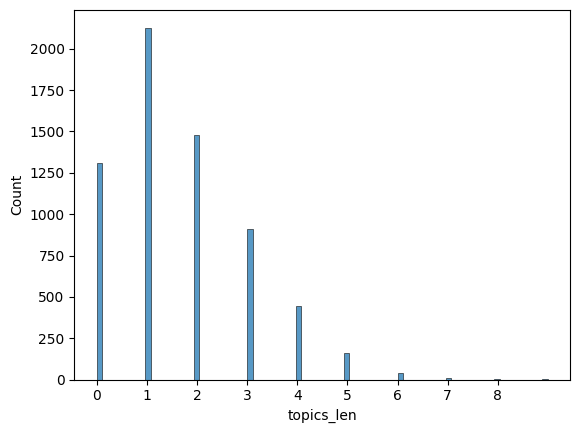

In [159]:
ax = sns.histplot(data=df, x="topics_len", )
ax.set_xticks([0,1,2,3,4,5,6,7,8])

In [160]:
df.query("topics_len == 0")

,text_id,text,user_id,user_topics,topics_len,text_len
27,203df43b-b0a3-4ad9-a7a7-44a9d77b652d,<b>ALLMERS Hraje si tam někde dole. BORGHEIM ...,cb2cd827-08fb-4483-b89f-ab287a57aa2c,[],0,125
62,61aebc5d-97cd-49b9-9098-7e0fa6bd0b5e,"<b>Zemědělská ústředna filmů a diapositivů, P...",3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,111
91,4c715e1d-6b4a-4152-944f-d64fde9e158e,"<b>Vedoucí redaktor: Petr Proser, akt. ředite...",3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,116
97,5e10448a-eb8e-4295-a653-ec2938537b40,"<b>Některé dvory ve vsech řečených Sosslewen,...",3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,166
137,ecb782eb-4cc3-4e4d-be66-96c0c5ca5003,<b>Marx a Hegel. Marxův historism heglovský s...,7defdc5a-9441-4adf-83f6-7dff58e6106e,[],0,120
...,...,...,...,...,...,...
6387,30b9be6e-bb95-4b63-bff5-d5a4db69dacd,"<b>Dowodi Fob, že moudroſt boži w zprawowáni ...",852596ac-6e92-43d5-93fd-23183611e51c,[],0,180
6399,eb939e2d-99c0-410f-8fd7-762d7e8a6f8b,"<b>Síla, jíž nelze podceňovat a s níž nutno p...",852596ac-6e92-43d5-93fd-23183611e51c,[],0,117
6404,98552511-f8eb-42bd-b1fd-d8900b1570e5,"<b>Jak je to k smíchu! Snad mu hledíš v líc, ...",2283e9b1-1b15-4638-b2a5-eb1bf6400f7d,[],0,124
6422,b25c0e2b-c3b8-4046-9cbd-753e9ac72234,<b>Není dáno jako zážitek a jako duševní neek...,852596ac-6e92-43d5-93fd-23183611e51c,[],0,131


,text_id,text,user_id,user_topics,topics_len,text_len
231,89d0cd20-cacb-4fa0-b632-97f9d3963715,"<b>česky, a má-li, neví, že k platnosti to je...",3d3576b3-78d9-4c54-bc2c-06929e310a5c,"[vlastenectví, konflikt vlastenectví, poněmčov...",5,1195
259,7198cfed-e77d-436a-83d9-ca76b5f551bd,<b>Thompson-ův indikator . . . 235 Tischbein-...,378fee78-267f-4c3f-8e23-6861105af343,"[vlakové součástky, manuál k lokomotivě, oprav...",4,1320
328,8dfe0832-adb7-407d-94fa-d287e26b3bc2,"<b>nemezcipö, p, plstěný střevíc, plstky. nem...",e894e0c2-75e3-4340-8cac-eb43b06a71e1,"[maďarská slovíčka, gramatika]",2,1261
336,d90101ca-3af8-4a8d-9dde-3dabd677237b,"<b>váltottgyermek, pod o, vržené dítě, podlož...",d2a76bf5-1134-479a-81f8-9b3c797b837a,[],0,1320
343,8b35ea6a-1236-4df0-b918-4cf6934806bd,"<b>kiválva, přísl., vyjma, vyjmouc, krom, mim...",35fbf6b3-0309-4741-a9a3-a17f992df734,[],0,1486
...,...,...,...,...,...,...
5067,af173390-b282-41e3-87ae-ed292f2cb34b,Včerejší konference u bána uvažovala o program...,35fbf6b3-0309-4741-a9a3-a17f992df734,[politika],1,1302
5147,e1983f31-9d0c-423a-bfdb-7e682c7ae2b9,<b>Zpravodaj pražské župy Československé stra...,35fbf6b3-0309-4741-a9a3-a17f992df734,[],0,1933
5930,c6593e61-c2ed-4cb9-830d-2ccf2bee25eb,<b>O starých reštantích. Jakož jest také JMCs...,7b7f9b9c-8498-48f0-8846-eb63141ada98,[],0,1312
6224,2ac256a2-54be-4cca-a79f-41f29731540d,Podlipného. Mimo jiné povolena stavba malírny ...,2283e9b1-1b15-4638-b2a5-eb1bf6400f7d,"[pohřeb , smrt , zařizování ]",3,1643


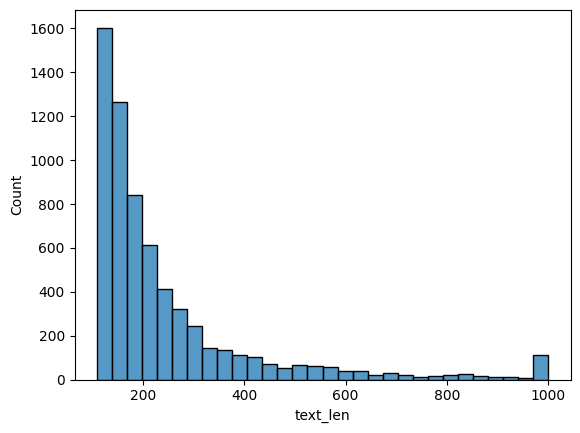

In [161]:
sns.histplot(np.clip(df["text_len"], 0, 1000) , bins=30)

sracka = df["text_len"].unique()
sracka.sort()
sracka
df.query("text_len > 1000 ")

In [162]:
from scipy import stats

df2 = df.query("text_len < 1000 ")
df_lens = df2[["text_len", "topics_len"]]
print(df_lens.corr())

res = stats.pearsonr(df2["text_len"], df2["topics_len"])
print(res)
res.confidence_interval(confidence_level=0.9)

            text_len  topics_len
text_len    1.000000    0.101675
topics_len  0.101675    1.000000
PearsonRResult(statistic=0.10167540517231398, pvalue=3.8847398751694483e-16)


ConfidenceInterval(low=0.08125394822443717, high=0.12201152973604652)

In [226]:
repeating_text_ids = df['text_id'].value_counts()
repeating_text_ids = repeating_text_ids[repeating_text_ids > 1]

df.loc[df['text_id'].isin(repeating_text_ids.keys())]



,text_id,text,user_id,user_topics,topics_len,text_len
46,ab7e751c-69ad-4cac-ad66-28065c9c5f84,"<b>Miluj! Žij v své lásky nebi a neptej se, j...",21e44144-01f2-40b1-a7a5-12f574274943,"[Láska žen, Touha po štěstí]",2,131
47,ab7e751c-69ad-4cac-ad66-28065c9c5f84,"<b>Miluj! Žij v své lásky nebi a neptej se, j...",21e44144-01f2-40b1-a7a5-12f574274943,"[Láska žen, Touha po štěstí]",2,131
142,818d1cac-21d1-436f-b392-6db7b48c7262,<b>A muž z Keriothu vyňal těch třicet stříbrn...,213b0200-9b03-4080-83f5-02195b128e19,"[popis mincí, biblické příběhy , příběh Jidáše]",3,262
143,818d1cac-21d1-436f-b392-6db7b48c7262,<b>A muž z Keriothu vyňal těch třicet stříbrn...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[popis izraelského šeklu],1,262
634,6f06e9fd-4de6-4ef0-994c-e49f4993e143,"<b>Poněvadž se soudcové nedali přesvědčiti, v...",35fbf6b3-0309-4741-a9a3-a17f992df734,[vražda],1,166
635,6f06e9fd-4de6-4ef0-994c-e49f4993e143,"<b>Poněvadž se soudcové nedali přesvědčiti, v...",35fbf6b3-0309-4741-a9a3-a17f992df734,[vražda],1,166
2659,8a7fe8af-5194-4110-9e6f-4dace50d894d,<b>Lamoignon (stranou). Nebesa! Oni mne drží ...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,223
2660,8a7fe8af-5194-4110-9e6f-4dace50d894d,<b>Lamoignon (stranou). Nebesa! Oni mne drží ...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,223
2738,731db828-9232-4b67-add2-f920b3f8a0c3,<b>a) Antonín Ulbricht. Po mém usídlení v Jak...,5b66aaa8-173e-414d-a38f-6fc156ae8b00,[sousedské výpůjčky ],1,388
2739,731db828-9232-4b67-add2-f920b3f8a0c3,<b>a) Antonín Ulbricht. Po mém usídlení v Jak...,3ff592b1-6789-4b4b-a5fc-5c000f2019be,[],0,388


In [182]:
sns.set_theme(style="white")

df2 = df2[["user_id", "topics_len"]]
df2.groupby(["user_id"]).count()


,topics_len
user_id,
19fd3eda-e640-4e08-9047-e413f2c148af,1
213b0200-9b03-4080-83f5-02195b128e19,1
2283e9b1-1b15-4638-b2a5-eb1bf6400f7d,5
22bb39f3-d32e-4f55-8d7d-8a75b3e634b1,158
35fbf6b3-0309-4741-a9a3-a17f992df734,474
378fee78-267f-4c3f-8e23-6861105af343,1
3d3576b3-78d9-4c54-bc2c-06929e310a5c,6
3ff592b1-6789-4b4b-a5fc-5c000f2019be,436
5b66aaa8-173e-414d-a38f-6fc156ae8b00,2


In [196]:

df3 = df[["user_id", "topics_len"]]
df3.groupby(["user_id"]).agg(["mean", "max", "count"])

topics_len          
                                           mean max count
user_id                                                  
19fd3eda-e640-4e08-9047-e413f2c148af   2.957806   6   237
213b0200-9b03-4080-83f5-02195b128e19   2.600000   6    15
21e44144-01f2-40b1-a7a5-12f574274943   2.045802   5   131
2283e9b1-1b15-4638-b2a5-eb1bf6400f7d   2.635135   7   148
22bb39f3-d32e-4f55-8d7d-8a75b3e634b1   1.659310   9   725
35fbf6b3-0309-4741-a9a3-a17f992df734   0.813462   4  1040
378fee78-267f-4c3f-8e23-6861105af343   1.667712   4   319
3d3576b3-78d9-4c54-bc2c-06929e310a5c   3.525822   8   213
3ff592b1-6789-4b4b-a5fc-5c000f2019be   0.760956   3  1255
5839f044-9d58-455b-a6db-e7f9b1a13b78   3.600000   6    30
5b66aaa8-173e-414d-a38f-6fc156ae8b00   2.933333   6    75
60864d37-28a8-426a-a90f-6a335f112f1f   3.289157   6    83
69f29c62-8596-482d-b35c-670ec8ea895e   1.960784   4    51
71445e13-e0e9-48f9-91e2-9f8f6541e197   1.000000   1     1
7b7f9b9c-8498-48f0-8846-eb63141ada98   3.057143   9   140
7c07539f-657f-4129-8a77-42d3ead90f11   2.500000   6    18
7defdc5a-9441-4adf-83f6-7dff58e6106e   2.549383   6   162
852596ac-6e92-43d5-93fd-23183611e51c   1.580952   6   420
98b0b8fc-e673-41df-98d6-12c03e13dddf   3.207547   8    53
a8ae3b5c-02d4-46ec-a6da-003a39c82e1a   0.000000   0    28
b7b63374-21e1-4225-a54c-1855f98a56d0   2.000000   2     1
c7b3eaa0-044e-4cd0-a8fb-3877cc6a7808   2.607362   6   163
cb2cd827-08fb-4483-b89f-ab287a57aa2c   1.329897   3   291
cda7a4d1-e749-4780-a4ea-a21d40030990   1.323077   5   130
d2a76bf5-1134-479a-81f8-9b3c797b837a   1.468635   5   271
e843c941-f58c-496e-af8a-beef38820b13   1.991525   6   118
e894e0c2-75e3-4340-8cac-eb43b06a71e1   3.158784   8   296
eaa19588-eac6-4798-ba39-4542c95654fc   3.200000   4     5
ed297c1f-e4d0-4173-9e7c-75d12f1b3040   0.960000   3    25
f6645b25-d1a6-406e-88a7-36e5f25426e5   1.100000   4    40
fc137b75-3cdd-48f2-92d4-054986c2b526   3.000000   3     1

a8ae3b5c-02d4-46ec-a6da-003a39c82e1a (6.zespodu) vzdycky neoznacil zadnou anotaci 28x